In [1]:
from datascience import *
import numpy as np
import math
%matplotlib inline

In [2]:
UCB_data = Table.read_table('data/UCOP.csv')
professors = UCB_data.where("Title", are.equal_to("PROF-AY"))

In [3]:
professors = professors.select(2,3,4,5).sort(3, descending=True)

In [4]:
professors

First Name,Last Name,Title,Gross Pay
STEPHEN,SHORTELL,PROF-AY,465004
ROBERT,BIRGENEAU,PROF-AY,451845
BIN,YU,PROF-AY,382058
OMAR,YAGHI,PROF-AY,368771
MARK,D'ESPOSITO,PROF-AY,363704
JOHN,HARTWIG,PROF-AY,354461
JASJEET,SEKHON,PROF-AY,344879
TROND,PETERSEN,PROF-AY,337817
ALEXANDER,PINES,PROF-AY,327886
SAUL,PERLMUTTER,PROF-AY,327861


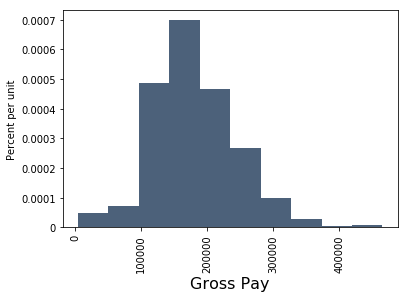

In [5]:
professors.select(3).hist()